In [7]:
import pandas as pd

df = pd.read_excel(r'C:\Users\Anitha\Desktop\HousePricePrediction\data\HousePricePrediction.xlsx')
df.head()


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [8]:
df.info()         # See column types and missing values
df.describe()     # Summary statistics for numeric columns
df.columns        # View all column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [16]:
# Keep rows where target is known, then fill other missing values
df = df[df['SalePrice'].notnull()]
df = df.fillna(df.mode().iloc[0])  # Fill remaining missing values with mode

In [30]:
df = pd.get_dummies(df, drop_first=True)
top_features = ['YearBuilt', 'TotalBsmtSF', 'LotArea', 'MSSubClass', 'YearRemodAdd']
X = df[top_features]
y = df['SalePrice']

# Train and save
model.fit(X, y)
joblib.dump(model, 'house_price_model.pkl')

# Save the feature list (order matters)
joblib.dump(top_features, 'features.pkl')

['features.pkl']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 1303903645.4301567
R² Score: 0.830006754574741


        Feature  Importance
0     YearBuilt    0.349855
1   TotalBsmtSF    0.334795
2       LotArea    0.184035
4  YearRemodAdd    0.066141
3    MSSubClass    0.065175


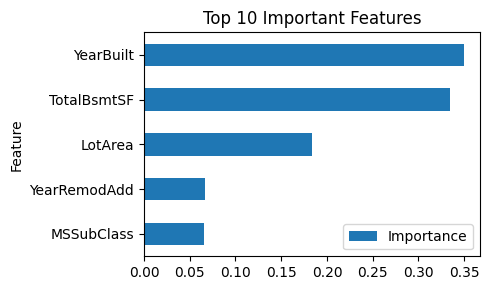

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = model.feature_importances_
features = X_train.columns  # or X.columns if not split
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Show top 10 features
print(importance_df.head(10))

# Optional: Plot them
importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', title='Top 10 Important Features', figsize=(5,3))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [35]:
import joblib
joblib.dump(model, 'house_price_model.pkl')

['house_price_model.pkl']